# Algorithms, pre-processing and evaluation metrices used
2. Impact Assessment: Does AI increase revenue or reduce jobs?
- Predicting Revenue or Job Changes due to AI


In [100]:
%pip install pandas matplotlib seaborn scikit-learn statsmodels


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('Global_AI_Content_Impact_Dataset.csv')  # Replace with your actual file path

print(df.columns)

# Define the target column (assuming we want to predict 'Job Loss Due to AI (%)')
target_column = 'Job Loss Due to AI (%)'

# Define features (X) and target (y)
X = df.drop(columns=[target_column, 'Country', 'Industry', 'Top AI Tools Used', 'Regulation Status'])  # Exclude non-numeric columns
y = df[target_column]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Index(['Country', 'Year', 'Industry', 'AI Adoption Rate (%)',
       'AI-Generated Content Volume (TBs per year)', 'Job Loss Due to AI (%)',
       'Revenue Increase Due to AI (%)', 'Human-AI Collaboration Rate (%)',
       'Top AI Tools Used', 'Regulation Status', 'Consumer Trust in AI (%)',
       'Market Share of AI Companies (%)'],
      dtype='object')


1. Algorithms for Analysis:
For Predicting Revenue or Job Changes due to AI, the best approach would depend on the nature of your data:

A. Predictive Modeling (Regression/Time Series)
i. Linear Regression
- Use Case: If your goal is to predict continuous values such as revenue increase due to AI adoption.
- Justification: Linear regression is simple and interpretable, ideal for capturing a linear relationship between AI adoption and revenue.

[20.83247799 20.51987107 22.79999103 25.06460762 29.70221481 19.24533404
 31.26087768 31.02305024 31.39928176 23.93746362 25.79066214 30.4466504
 26.41359645 18.91059957 33.44969178 25.98815717 25.76100496 19.04915017
 26.88568976 18.59211318 25.73255243 29.47754356 28.6798546  26.57033845
 31.70818011 26.05260208 20.68559363 31.72773471 27.38619991 20.76301273
 25.17884128 24.78221214 25.41651207 19.53960457 26.23362476 28.09633399
 23.14214798 30.07767946 23.04390626 22.10512568]


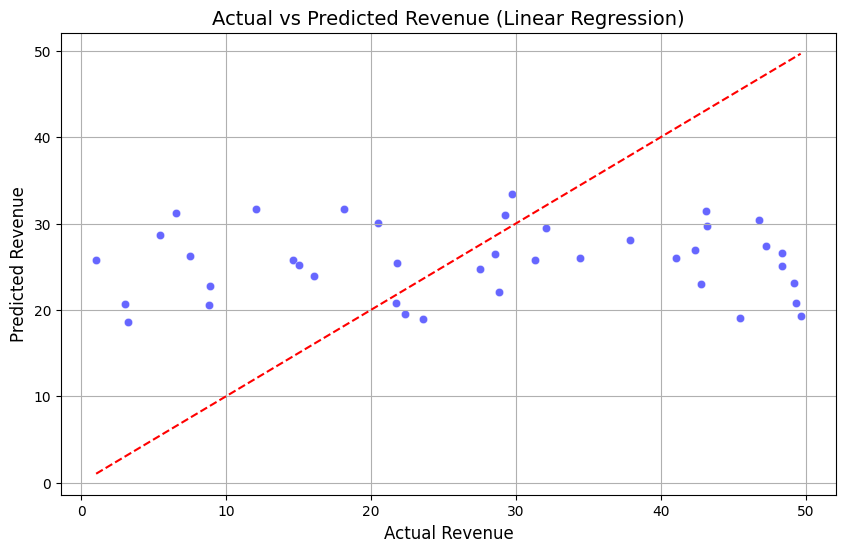

In [102]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


model = LinearRegression()
model.fit(X_train, y_train)
revenue_prediction = model.predict(X_test)
print(revenue_prediction)


# Step 2: Plotting the actual vs predicted revenue values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, revenue_prediction, color='blue', alpha=0.6, edgecolors="w", linewidth=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect prediction

# Titles and labels
plt.title('Actual vs Predicted Revenue (Linear Regression)', fontsize=14)
plt.xlabel('Actual Revenue', fontsize=12)
plt.ylabel('Predicted Revenue', fontsize=12)
plt.grid(True)

plt.show()

ii. Random Forest / XGBoost Regression

Use Case: If AI’s impact on revenue is more complex, or if the relationship between AI and revenue is non-linear.

Justification: These algorithms can handle non-linear relationships, are robust to outliers, and can capture feature importance. Random Forests or XGBoost would be suitable for this case.

[18.8472 21.9001 19.5468 24.6854 28.3311 23.1859 34.2199 29.5229 35.3702
 18.9045 28.6164 30.4335 30.0028 22.9915 32.9487 32.911  26.3859 16.4378
 22.3395 18.0442 24.2843 26.1843 31.7556 24.19   32.4918 25.9149 22.2624
 26.3327 25.0972 15.7776 20.854  19.2011 22.3174 23.5489 23.4478 25.5813
 25.8041 30.0031 22.6584 16.7855]


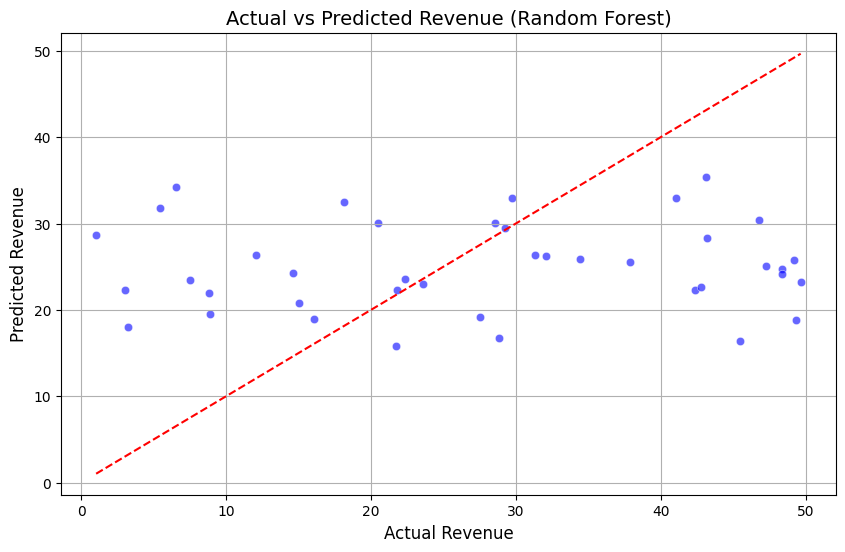

In [103]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
revenue_prediction = model.predict(X_test)
print(revenue_prediction)

# Step 2: Plotting the actual vs predicted revenue values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, revenue_prediction, color='blue', alpha=0.6, edgecolors="w", linewidth=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect prediction

# Titles and labels
plt.title('Actual vs Predicted Revenue (Random Forest)', fontsize=14)
plt.xlabel('Actual Revenue', fontsize=12)
plt.ylabel('Predicted Revenue', fontsize=12)
plt.grid(True)

plt.show()

B. Classification (If Categories Exist)
i. Logistic Regression / Decision Trees (for classifying job reductions or revenue growth)

Use Case: If you're classifying whether AI causes significant job reduction or revenue growth (e.g., "Low", "Medium", "High" impact categories).

Justification: These algorithms are good for binary or multi-class classification tasks, like classifying the severity of AI's impact on jobs or revenue.

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# Step 1: Create target label - categorize job loss
def categorize_job_loss(x):
    if x < 20:
        return 'Low'
    elif x < 40:
        return 'Medium'
    else:
        return 'High'

df['Job_Loss_Category'] = df['Job Loss Due to AI (%)'].apply(categorize_job_loss)

# Step 2: Encode categorical features
label_encoder = LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country'])
df['Industry'] = label_encoder.fit_transform(df['Industry'])
df['Top AI Tools Used'] = label_encoder.fit_transform(df['Top AI Tools Used'])
df['Regulation Status'] = label_encoder.fit_transform(df['Regulation Status'])

# Step 3: Define features (X) and target (y)
X_lrg = df.drop(columns=['Job Loss Due to AI (%)', 'Job_Loss_Category'])
y_lrg = df['Job_Loss_Category']

# Step 4: Train-test split
X_train_lrg, X_test_lrg, y_train_lrg, y_test_lrg = train_test_split(X_lrg, y_lrg, test_size=0.2, random_state=42)

# Step 5: Train logistic regression model
model_lrg = LogisticRegression(max_iter=1000)
model_lrg.fit(X_train_lrg, y_train_lrg)

# Step 6: Predict and evaluate
impact_prediction = model_lrg.predict(X_test_lrg)
print(classification_report(y_test_lrg, impact_prediction))

              precision    recall  f1-score   support

        High       0.33      0.08      0.12        13
         Low       0.31      0.31      0.31        13
      Medium       0.46      0.79      0.58        14

    accuracy                           0.40        40
   macro avg       0.37      0.39      0.34        40
weighted avg       0.37      0.40      0.34        40



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


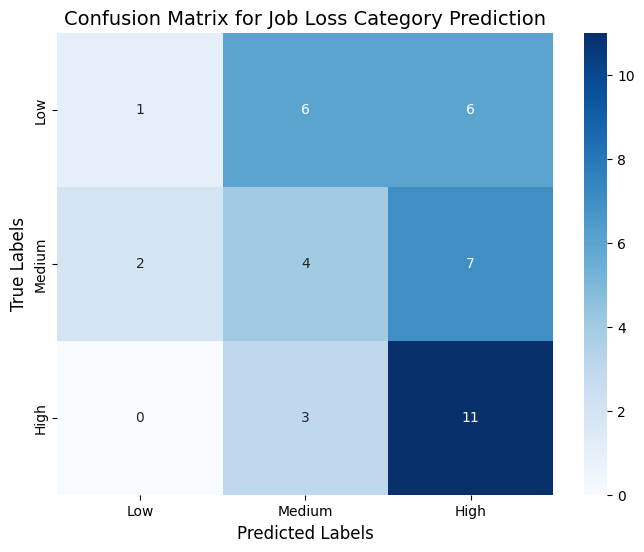

In [105]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test_lrg, impact_prediction)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])

plt.title('Confusion Matrix for Job Loss Category Prediction', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()


ii. Clustering (K-Means, DBSCAN)
Use Case: If you have no predefined categories and want to find patterns or clusters based on AI adoption, revenue, or job impact.

Justification: If you're unsure how to categorize the impact and want to uncover hidden segments or patterns, clustering could reveal interesting insights.

In [106]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_train)
print(clusters)

[1 2 0 0 2 2 0 0 1 2 2 1 1 1 1 0 2 2 0 0 0 0 0 2 1 0 2 0 0 2 1 0 2 1 1 1 1
 0 1 0 2 1 0 2 2 0 0 0 1 1 0 1 1 2 1 1 0 0 0 0 2 2 0 0 1 0 1 1 1 1 1 0 0 1
 0 1 1 1 2 2 0 0 1 1 0 0 2 0 1 0 1 2 2 0 2 1 2 2 0 1 2 0 1 1 0 0 0 1 2 1 0
 0 0 1 2 0 0 1 1 1 2 1 0 0 0 1 0 1 0 1 0 0 1 0 1 2 0 0 2 0 2 1 2 2 0 0 0 2
 2 0 0 0 0 2 2 2 2 2 1 1]


2. Data Preprocessing Steps:
To make sure the models work efficiently and generate accurate results, consider the following preprocessing steps:

A. Handling Missing Data
Impute or drop missing values, especially if they are critical for features like revenue or employment numbers.

In [107]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # For numerical data
X_imputed = imputer.fit_transform(X_train)

B. Feature Engineering
Normalization: Use if you’re applying algorithms like K-Means that depend on distance metrics.

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

One-Hot Encoding: For categorical features like media sector or AI impact classification, convert them into numerical features.

In [109]:
from sklearn.preprocessing import OneHotEncoder

import sklearn
print(sklearn.__version__)
print(X_train_lrg.columns)

encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X_train_lrg[['Industry']])


1.6.1
Index(['Country', 'Year', 'Industry', 'AI Adoption Rate (%)',
       'AI-Generated Content Volume (TBs per year)',
       'Revenue Increase Due to AI (%)', 'Human-AI Collaboration Rate (%)',
       'Top AI Tools Used', 'Regulation Status', 'Consumer Trust in AI (%)',
       'Market Share of AI Companies (%)'],
      dtype='object')


D. Outlier Removal
If the dataset has extreme outliers (e.g., unexpected spikes in revenue), it’s important to remove or handle them.

In [110]:
from scipy import stats
import numpy as np
X_train_no_outliers = X_train[(np.abs(stats.zscore(X_train)) < 3).all(axis=1)]

3. Evaluation Metrics:
The metrics you use will depend on whether you're predicting continuous values (e.g., revenue) or categorical outcomes (e.g., job reductions):

A. Regression (Predicting Continuous Values)
i. Mean Absolute Error (MAE) and R² Score are key for evaluating regression models predicting revenue.

In [111]:
from sklearn.metrics import mean_absolute_error, r2_score
print("MAE:", mean_absolute_error(y_test, revenue_prediction))
print("R² Score:", r2_score(y_test, revenue_prediction))

MAE: 13.584772499999996
R² Score: -0.1086150825989809


B. Classification (Categorical Outcomes)
i. Accuracy / F1-Score: Evaluate the classification model based on how well it classifies job reduction or revenue growth.

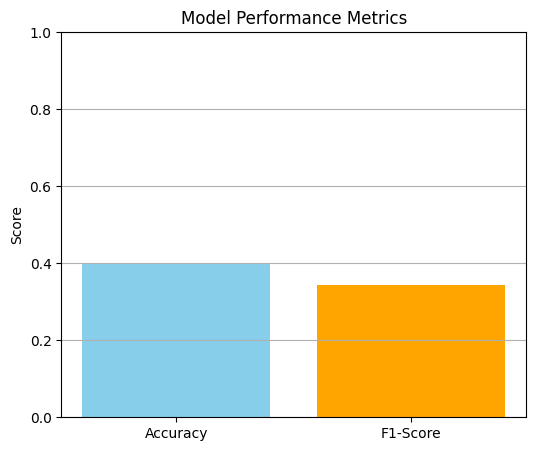

In [112]:
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Calculate metrics
accuracy = accuracy_score(y_test_lrg, impact_prediction)
f1 = f1_score(y_test_lrg, impact_prediction, average='weighted')

# print("Accuracy:", accuracy_score(y_test_lrg, impact_prediction))
# print("F1-Score:", f1_score(y_test_lrg, impact_prediction, average='weighted'))

# Plotting
plt.figure(figsize=(6, 5))
plt.bar(['Accuracy', 'F1-Score'], [accuracy, f1], color=['skyblue', 'orange'])
plt.ylim(0, 1)
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.grid(axis='y')
plt.show()


ii. Precision-Recall Curve: This is particularly useful when the data is imbalanced (e.g., more revenue growth than job reductions).

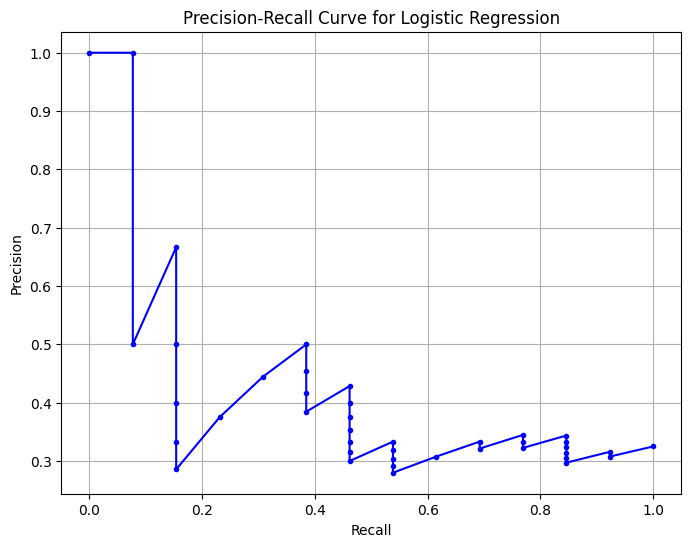

In [113]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt


precision, recall, _ = precision_recall_curve(y_test_lrg, model_lrg.predict_proba(X_test_lrg)[:, 1], pos_label='High')

# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='blue')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

To compare the performance of all the models (Logistic Regression, Random Forest Regressor, and Linear Regression) in terms of prediction accuracy and performance metrics, we can follow these steps:

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folders/37/53h4p6t90b1g004cj5wzj8g40000gn/T/ipykernel_91137/3811822128.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(regression_labels, rotation=45, ha="right")


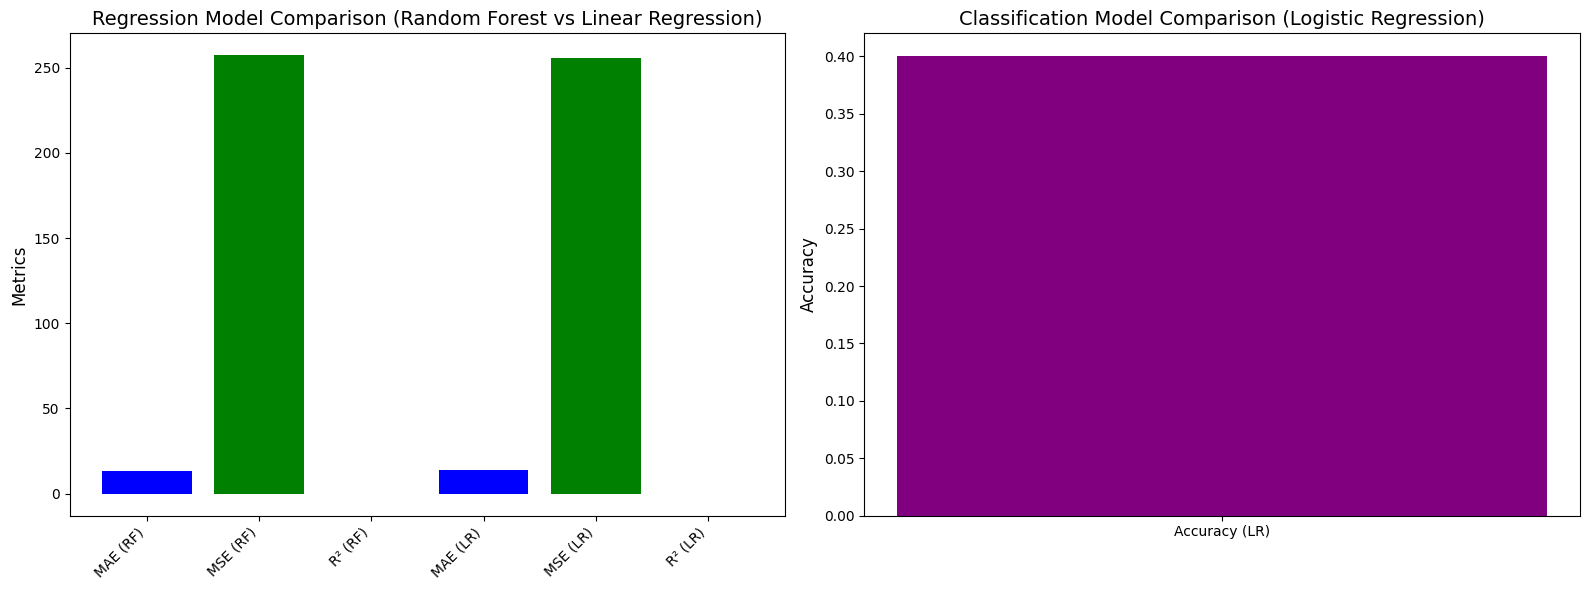

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

        High       0.33      0.08      0.12        13
         Low       0.31      0.31      0.31        13
      Medium       0.46      0.79      0.58        14

    accuracy                           0.40        40
   macro avg       0.37      0.39      0.34        40
weighted avg       0.37      0.40      0.34        40



In [114]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

# Step 1: Train Logistic Regression Model for classification (Categorize Job Loss)
model_lrg = LogisticRegression(max_iter=1000)
model_lrg.fit(X_train_lrg, y_train_lrg)
impact_prediction_lrg = model_lrg.predict(X_test_lrg)

# Calculate performance metrics for Logistic Regression
accuracy_lrg = accuracy_score(y_test_lrg, impact_prediction_lrg)
classification_report_lrg = classification_report(y_test_lrg, impact_prediction_lrg)

# Step 2: Train Random Forest Regressor for regression (Revenue Prediction)
model_rf = RandomForestRegressor(n_estimators=100)
model_rf.fit(X_train, y_train)
revenue_prediction_rf = model_rf.predict(X_test)

# Calculate performance metrics for Random Forest Regressor
mae_rf = mean_absolute_error(y_test, revenue_prediction_rf)
mse_rf = mean_squared_error(y_test, revenue_prediction_rf)
r2_rf = r2_score(y_test, revenue_prediction_rf)

# Step 3: Train Linear Regression Model for regression (Revenue Prediction)
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
revenue_prediction_lr = model_lr.predict(X_test)

# Calculate performance metrics for Linear Regression
mae_lr = mean_absolute_error(y_test, revenue_prediction_lr)
mse_lr = mean_squared_error(y_test, revenue_prediction_lr)
r2_lr = r2_score(y_test, revenue_prediction_lr)

# Step 4: Plotting the Comparison of Models

# For Regression Models
regression_metrics = [mae_rf, mse_rf, r2_rf, mae_lr, mse_lr, r2_lr]
regression_labels = ['MAE (RF)', 'MSE (RF)', 'R² (RF)', 'MAE (LR)', 'MSE (LR)', 'R² (LR)']

# For Classification Model (Accuracy)
classification_metrics = [accuracy_lrg]
classification_labels = ['Accuracy (LR)']

# Create subplots to compare
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot Regression Metrics
ax[0].bar(regression_labels, regression_metrics, color=['blue', 'green', 'red', 'blue', 'green', 'red'])
ax[0].set_title('Regression Model Comparison (Random Forest vs Linear Regression)', fontsize=14)
ax[0].set_ylabel('Metrics', fontsize=12)
ax[0].set_xticklabels(regression_labels, rotation=45, ha="right")

# Plot Classification Accuracy
ax[1].bar(classification_labels, classification_metrics, color='purple')
ax[1].set_title('Classification Model Comparison (Logistic Regression)', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=12)

plt.tight_layout()
plt.show()

# Print Classification Report for Logistic Regression
print("Classification Report for Logistic Regression:")
print(classification_report_lrg)
